# Flood Adaptation: Minimal Model

This python script outlines a basic Agent-Based Model (ABM) developed using the Mesa framework, designed as a simplified representation of household adaptation to flood events in a social network context. The model serves as a template for understanding the fundamental mechanics of flood adapdtation with a given social network.

This directory is structured as follows:
 - A Mesa Agent class `Households` is defined in `agents.py`
 - A Mesa Agent class `Government` is defined in `agents.py` (this agent currently does not perform any action)
 - A Mesa Model class `AdaptationModel` is defined in `model.py`
 - This notebook `demo.ipynb` provides a demonstration of the model and its visualization.

Each household agent in the model represents a household with attributes and behaviors that determine its response to flood events. The flood depth attribute assigned to each household is currently random for demonstration purposes. The decision by each household to adapt is also arbitrary. In a more comprehensive model, this could be replaced with more sophisticated decision-making algorithms.

The current implementation includes several simplifications and arbitrary choices, such as random flood depths and basic adaptation logic based on random thresholds. These aspects are designed for clarity and ease of understanding and should be replaced with realistic and sound choices.

You are encouraged to modify, expand, and customize the model. This might include integrating real-world data, implementing more complex decision-making processes for agents, or exploring different network topologies and their effects on social dynamics.

The visualisation provided is basic. Additional aspects can be added for visualization and more in-depth analysis.

_This notebook was tested on 2023-11-13 with Mesa version 2.1.4 on Python 3.12.0._

# Running the model and visualizing the model domain and social network over time

In [1]:
from model import AdaptationModel
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns

# Initialize the Adaptation Model with 50 household agents.
model = AdaptationModel(number_of_households=50, flood_map_choice="harvey", network="watts_strogatz", I_threshold=50000, policy=1.0) # flood_map_choice can be "harvey", "100yr", or "500yr"

# Calculate positions of nodes for the network plot.
# The spring_layout function positions nodes using a force-directed algorithm,
# which helps visualize the structure of the social network.
pos = nx.spring_layout(model.G)

# Define a function to plot agents on the network.
# This function takes a matplotlib axes object and the model as inputs.
def plot_network(ax, model):
    # Clear the current axes.
    ax.clear()
    # Determine the color of each node (agent) based on their adaptation status.
    colors = ['blue' if agent.is_adapted else 'red' for agent in model.schedule.agents]
    # Draw the network with node colors and labels.
    nx.draw(model.G, pos, node_color=colors, with_labels=True, ax=ax)
    # Set the title of the plot with the current step number.
    ax.set_title(f"Social Network State at Step {model.schedule.steps}", fontsize=12)

# Generate the initial plots at step 0.
# Plot the spatial distribution of agents. This is a function written in the model.py
model.plot_model_domain_with_agents()

# Plot the initial state of the social network.
fig, ax = plt.subplots(figsize=(7, 7))
plot_network(ax, model)
plt.show()

# Run the model for 20 steps and generate plots every 5 steps.
for step in range(20):
    model.step()

    # Every 5 steps, generate and display plots for both the spatial distribution and network.
    # Note the first step is step 0, so the plots will be generated at steps 4, 9, 14, and 19, which are the 5th, 10th, 15th, and 20th steps.
    if (step + 1) % 5 == 0:
        # Plot for the spatial map showing agent locations and adaptation status.
        plt.figure(figsize=(10, 6))
        model.plot_model_domain_with_agents()

        # Plot for the social network showing connections and adaptation statuses.
        fig, ax = plt.subplots(figsize=(7, 7))
        plot_network(ax, model)
        plt.show()



KeyboardInterrupt: 

In [ ]:
#random seed blijft het zelfde bij sensitivity analyse
#model = AdaptationModel(number_of_households=50, flood_map_choice="harvey",seed = 42, network="watts_strogatz") # flood_map_choice can be "harvey", "100yr", or "500yr"


# experiment 1
#zelfde paramaters toetsen

result = [] 

for i in range(100):
    model = AdaptationModel(number_of_households=50, flood_map_choice="harvey", network="watts_strogatz") # flood_map_choice can be "harvey", "100yr", or "500yr"
    for j in range(20):
        model.step()
    output = model.datacollector.get_agent_vars_dataframe()
    output['run_number'] = i
    result.append(output)

In [ ]:
for run in result:
    sns.lineplot(run['Worry'].groupby('Step').mean())

In [ ]:
result[0]['Worry'].groupby('Step').mean()

In [ ]:
import pandas as pd

In [ ]:
agent_data = model.datacollector.get_agent_vars_dataframe()
#agent_data['Worry'].describe()
#agent_data.worry 
agent_data['Age'].describe()
agent_data.iloc[-50:-1]['FloodDamageActual'].sum()
#agent_data.to_csv('I=55000')

10.976009583682497

In [ ]:
I_4000= pd.read_csv('I=40000')
I_4500 = pd.read_csv('I=45000')
I_5000 = pd.read_csv('I=50000')
I_5500 = pd.read_csv('I=55000')


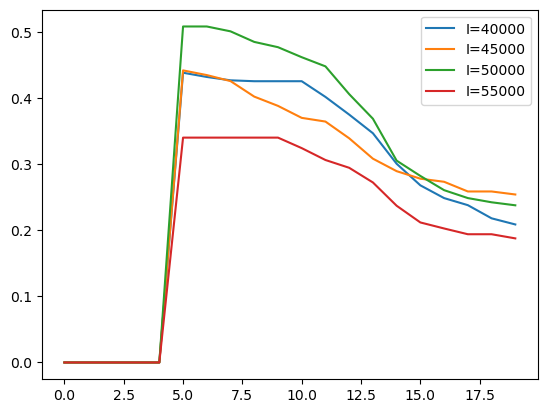

In [ ]:
plt.plot(I_4000.groupby(by='Step')['FloodDamageActual'].mean(), label= 'I=40000')
plt.plot(I_4500.groupby(by='Step')['FloodDamageActual'].mean(), label= 'I=45000')
plt.plot(I_5000.groupby(by='Step')['FloodDamageActual'].mean(), label= 'I=50000')
plt.plot(I_5500.groupby(by='Step')['FloodDamageActual'].mean(), label= 'I=55000')
plt.legend()

In [ ]:
agent_data.iloc[-50:-1]['Self_Investment'].mean() #average of self_investment of all agent

0.32244897959183677

In [ ]:
agent_data.iloc[-50:-1]['Cum_Invest'].mean() #average of cumulative neighbor investment of all agents
#lower value probably because some agent do not have neighbors

1.236734693877551

In [ ]:
agent_data.iloc[-50:-1]['Costs'].mean()

0.6289795918367348

In [ ]:
steps = np.arange(0,20)

Text(0.5, 1.0, 'Cumulative Neighbour Invest over Time')

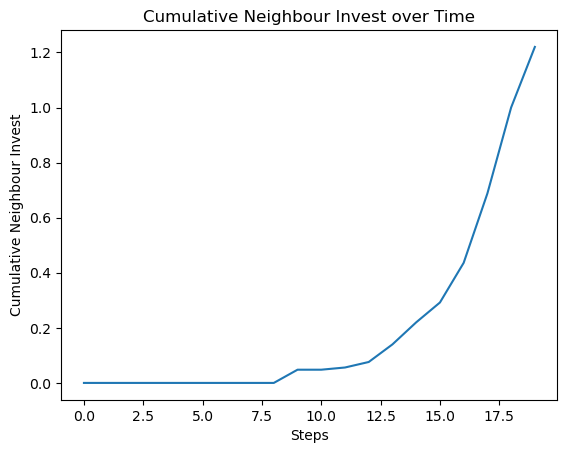

In [ ]:
plt.plot(steps, agent_data.groupby(by='Step')['Cum_Invest'].mean(), label = 'Cumulative Neighbour Invest')
plt.ylabel('Cumulative Neighbour Invest')
plt.xlabel('Steps')
plt.title('Cumulative Neighbour Invest over Time')

Text(0.5, 1.0, 'Self Adaptation')

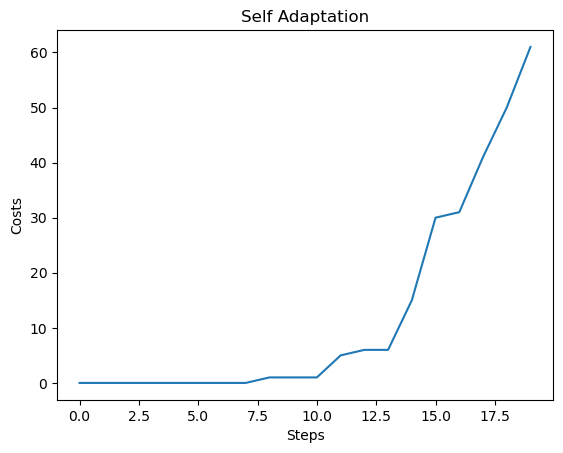

In [ ]:
plt.plot(steps, agent_data.groupby(by='Step')['Self_Adaption'].sum(), label = 'Costs')
plt.ylabel('Costs')
plt.xlabel('Steps')
plt.title('Self Adaptation')

Text(0.5, 1.0, 'Costs over Time')

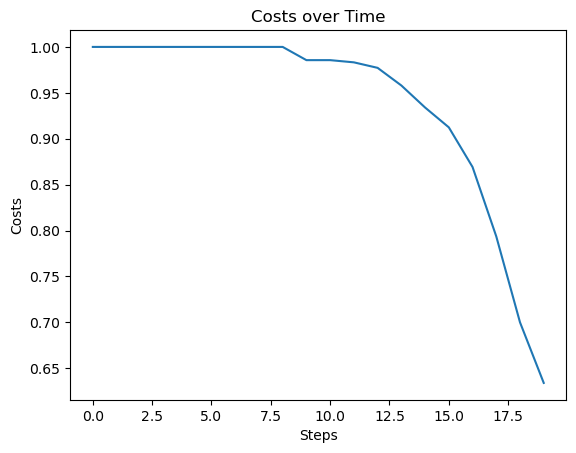

In [ ]:
plt.plot(steps, agent_data.groupby(by='Step')['Costs'].mean(), label = 'Costs')
plt.ylabel('Costs')
plt.xlabel('Steps')
plt.title('Costs over Time')

Text(0.5, 1.0, 'Worry over Time')

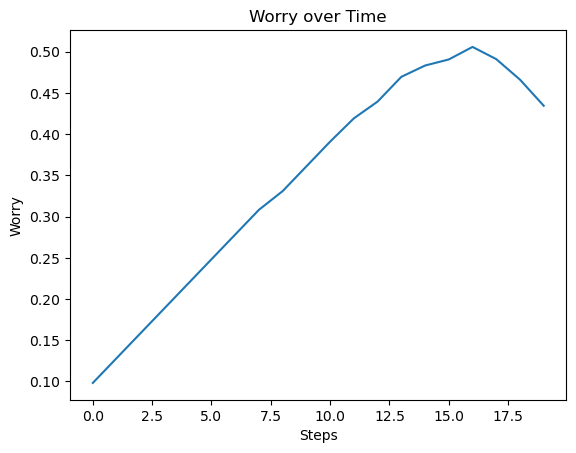

In [ ]:
plt.plot(steps, agent_data.groupby(by='Step')['Worry'].mean(), label='Worry')
plt.ylabel('Worry')
plt.xlabel('Steps')
plt.title('Worry over Time')

Text(0.5, 1.0, 'Flood Damage over Time')

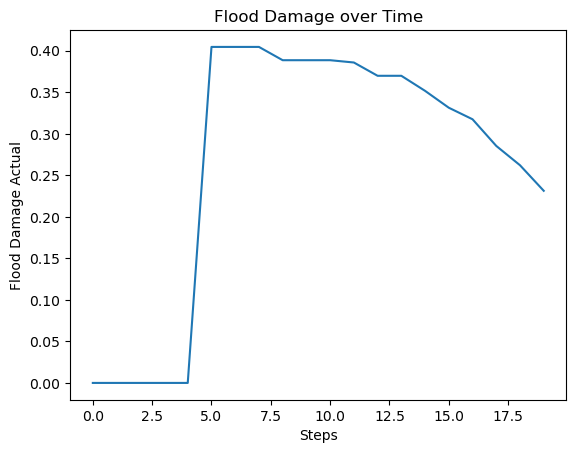

In [ ]:
plt.plot(steps, agent_data.groupby(by='Step')['FloodDamageActual'].mean())
plt.ylabel('Flood Damage Actual')
plt.xlabel('Steps')
plt.title('Flood Damage over Time')

In [ ]:
import pandas as pd

In [ ]:
#I_50000 = agent_data.groupby(by='Step')['Worry'].mean()
I_45000 = agent_data.groupby(by='Step')['Worry'].mean()
#I_55000 = agent_data.groupby(by='Step')['Worry'].mean()

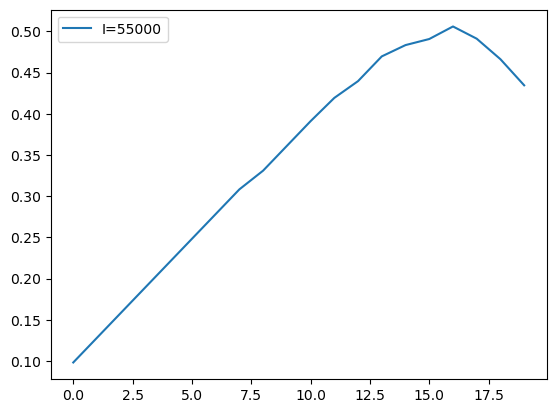

In [ ]:
#plt.plot(I_50000, label='I=50000')
#plt.plot(I_45000, label='I=45000')
plt.plot(agent_data.groupby(by='Step')['Worry'].mean(), label='I=55000')
plt.legend()

Text(0.5, 1.0, 'Flood measurement active (Step10)')

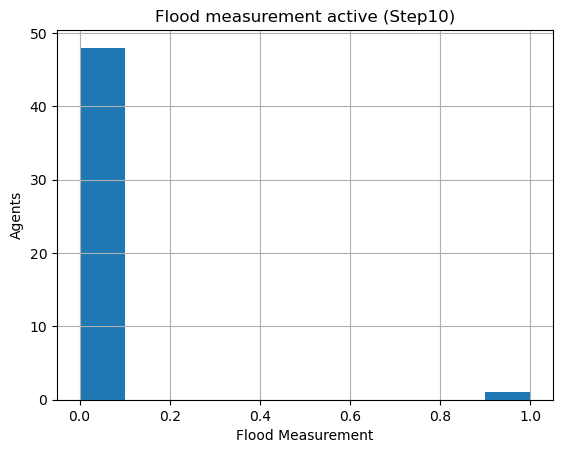

In [ ]:
agent_data.iloc[-500:-451]['Self_Adaption'].hist()
plt.ylabel('Agents')
plt.xlabel('Flood Measurement')
plt.title('Flood measurement active (Step10)')

Text(0.5, 1.0, 'Flood measurement active (Step19)')

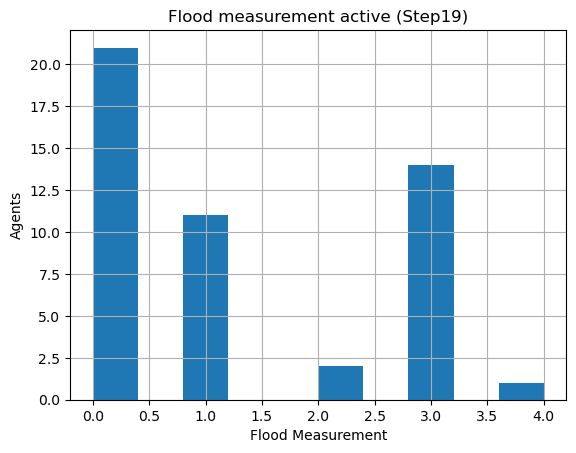

In [ ]:
agent_data.iloc[-50:-1]['Self_Adaption'].hist()
plt.ylabel('Agents')
plt.xlabel('Flood Measurement')
plt.title('Flood measurement active (Step19)')

<Axes: xlabel='Step'>

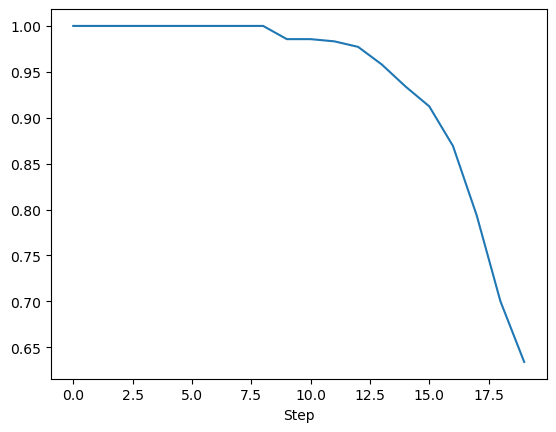

In [ ]:
agent_data.groupby(by='Step')['Costs'].mean().plot()

In [ ]:
agent_data.iloc[-50:-1]

FloodDepthEstimated  FloodDamageEstimated  FloodDepthActual  \
Step AgentID                                                                
19   0                   0.000000              0.000000          0.000000   
     1                   0.000000              0.000000          0.000000   
     2                   0.396629              0.486838          0.215283   
     3                   0.000000              0.000000          0.000000   
     4                   0.000000              0.000000          0.000000   
     5                   1.210670              0.681679          0.670904   
     6                   0.174896              0.343874          0.121210   
     7                   0.651323              0.573440          0.560085   
     8                   5.944263              0.959512          6.041890   
     9                  10.546524              1.000000          7.127530   
     10                  0.254671              0.409485          0.173455   
     11                  3.937463              0.887596          3.534824   
     12                  0.523109              0.535165          0.528522   
     13                  0.000000              0.000000          0.000000   
     14                  1.024773              0.652573          0.618697   
     15                  0.000000              0.000000          0.000000   
     16                  0.000000              0.000000          0.000000   
     17                  1.711307              0.742105          0.911105   
     18                  4.083806              0.893967          4.289456   
     19                  0.979927              0.644760          0.728508   
     20                  0.000000              0.000000          0.000000   
     21                  0.943268              0.638102          0.554628   
     22                  4.466265              0.909598          2.645743   
     23                  0.431896              0.501711          0.277224   
     24                  0.298721              0.437341          0.255772   
     25                  0.211576              0.377117          0.132182   
     26                  0.308521              0.442977          0.232011   
     27                  0.000000              0.000000          0.000000   
     28                  0.170330              0.339255          0.178998   
     29                  0.310196              0.443922          0.160647   
     30                  2.723841              0.823257          1.849879   
     31                  0.000000              0.000000          0.000000   
     32                  0.274433              0.422534          0.211420   
     33                  0.174072              0.343049          0.168599   
     34                  0.000000              0.000000          0.000000   
     35                  0.000000              0.000000          0.000000   
     36                  0.000000              0.000000          0.000000   
     37                  0.187994              0.356483          0.181368   
     38                  0.397869              0.487383          0.248127   
     39                  0.764999              0.601528          0.444782   
     40                  0.317734              0.448114          0.258323   
     41                  2.970158              0.838372          1.624986   
     42                  0.215015              0.379932          0.194114   
     43                  0.952953              0.639886          0.572208   
     44                  1.317358              0.696425          1.281584   
     45                  5.443996              0.944162          6.111889   
     46                  1.512163              0.720504          1.333170   
     47                  1.716835              0.742668          1.129388   
     48                  0.000000              0.000000          0.000000   

              FloodDamageActual  IsAdapted  FriendsCount  \
Step AgentID              

<Axes: >

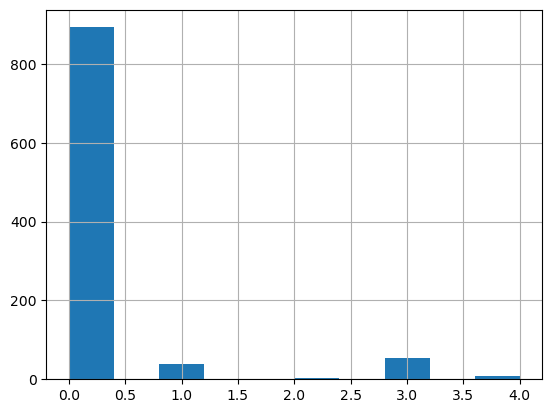

In [ ]:
#last round Adaptation measurements: (step19)
agent_data['Self_Adaption'].hist()
#worry needs to have higher impact 

In [ ]:
agent_data['FriendsCount']

Step  AgentID
0     0          4
      1          2
      2          6
      3          3
      4          3
                ..
19    45         3
      46         5
      47         4
      48         3
      49         4
Name: FriendsCount, Length: 1000, dtype: int64

<Axes: xlabel='Step'>

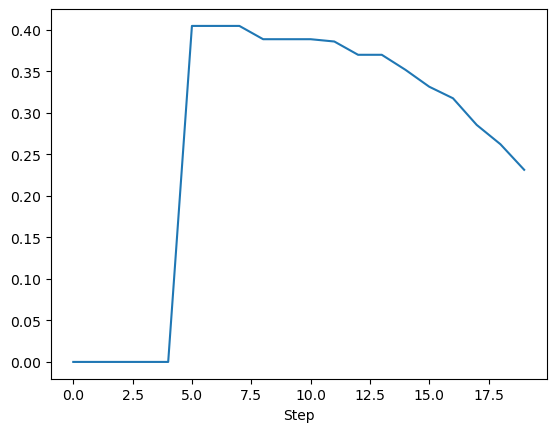

In [ ]:
agent_data.groupby(by='Step')['FloodDamageActual'].mean().plot()
#agent_data.groupby(by='Step')['A].mean().plot()

<Axes: xlabel='Step'>

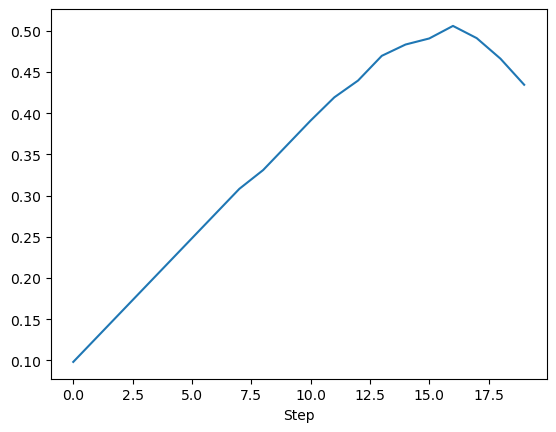

In [ ]:
agent_data.groupby(by='Step')['Worry'].mean().plot()

In [ ]:
agent_data.groupby(by='Step')['Self_Investment'].mean()


Step
0     0.000
1     0.000
2     0.000
3     0.000
4     0.000
5     0.000
6     0.000
7     0.000
8     0.016
9     0.016
10    0.016
11    0.020
12    0.036
13    0.036
14    0.060
15    0.100
16    0.116
17    0.176
18    0.240
19    0.316
Name: Self_Investment, dtype: float64

In [ ]:
agent_data.iloc[-100:-51]['FloodDamageActual'].mean()

0.2554046019236938

In [ ]:
agent_data.iloc[-500:-451]['FloodDamageActual'].mean()

0.38446811325213087

In [ ]:
agent_data.iloc[-600:-551]['FloodDamageActual'].mean()

0.38446811325213087

In [ ]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data
#change

,total_adapted_households
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,1
9,1
